# Neural network for classification


## Simple dataset

We can generate this very simple dataset to do some testing for different implementations of neural network.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nb_sim=200

X=np.concatenate([np.linspace(0,10,nb_sim),
                  np.linspace(9,21,nb_sim),
                  np.linspace(22,30,nb_sim)])
y=np.concatenate([np.repeat(0,nb_sim),
                  np.repeat(1,nb_sim),
                  np.repeat(0,nb_sim)])


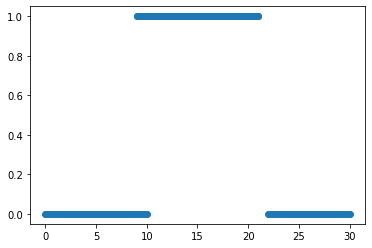

In [41]:
plt.scatter(X,y)

Normalization of the data

You have to normalize the dataset first. You can skip this step and see what happens.

In [7]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

print("Mean :", round(np.mean(X), 2))
print("Standard Deviation :", round(np.std(X), 2))

Mean : -0.0
Standard Deviation : 1.0


## Test your own implementation

After you created a neural network for classification, you can test your algorithm for the following dataset, you can generate yourself.

In [58]:
from math import exp
from random import random, shuffle

# First we split the dataset into a 80/20 rate
def train_test_split(dataset):
  train_rate = int(0.8*len(dataset))
  train = dataset[:train_rate]
  test = dataset[train_rate:]
  return train, test

# Shuffle the dataset
def shuffle_dataset(dataset):
  shuffle(dataset)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Calculate neuron activation for an input
def activate(weights, inputs):
  # We calculate the sum of bias and WiXi first we retrieve the bias.
	activation = weights[-1] # Bias
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation (sigmoid)
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
  
# Make a prediction with a network
def predict(network, row):
  outputs = forward_propagate(network, row)
  return outputs.index(max(outputs))
 
# Create the dataset
dataset = list()
for i in range(len(X)):
  dataset.append([X[i], y[i]])

# Shuffle the dataset
shuffle_dataset(dataset)

# Split the dataset
train, test = train_test_split(dataset)

# Test training backward propagation algorithm
n_inputs = len(train[0]) - 1
n_outputs = len(set([row[-1] for row in train]))
network = initialize_network(n_inputs, 5, n_outputs)
train_network(network, train, 0.5, 20, n_outputs)

>epoch=0, lrate=0.500, error=233.450
>epoch=1, lrate=0.500, error=224.623
>epoch=2, lrate=0.500, error=219.661
>epoch=3, lrate=0.500, error=218.327
>epoch=4, lrate=0.500, error=226.342
>epoch=5, lrate=0.500, error=225.218
>epoch=6, lrate=0.500, error=222.860
>epoch=7, lrate=0.500, error=217.623
>epoch=8, lrate=0.500, error=220.087
>epoch=9, lrate=0.500, error=216.429
>epoch=10, lrate=0.500, error=222.039
>epoch=11, lrate=0.500, error=220.819
>epoch=12, lrate=0.500, error=220.219
>epoch=13, lrate=0.500, error=219.664
>epoch=14, lrate=0.500, error=218.587
>epoch=15, lrate=0.500, error=215.219
>epoch=16, lrate=0.500, error=219.439
>epoch=17, lrate=0.500, error=218.023
>epoch=18, lrate=0.500, error=217.668
>epoch=19, lrate=0.500, error=217.462


Test

In [59]:
import matplotlib.pyplot as plt

# Predict the test set and compute the mean square error
n = len(test)
errors = 0
predictions = list()
values = list([row[0] for row in test])
for row in test:
  prediction = predict(network, row)
  predictions.append(prediction)
  error = row[-1] - prediction
  squared_error = error**2
  errors += squared_error
  #print('Expected=%d, Got=%d' % (row[-1], prediction))
MSE = errors/n
print('MSE:', MSE)

MSE: 0.3416666666666667


Visualization of the final result (since the dataset has only one variable, you can visualize the predictions)

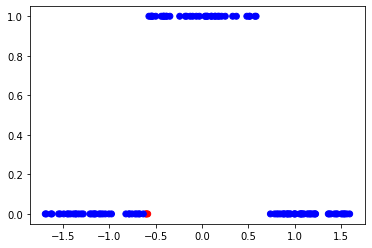

In [14]:
#Visualization
cs = ["blue" if predictions[i]==test[i][1] else "red" for i in range(len(predictions))]
plt.scatter(values,predictions,color=cs)

## Implementation with Tensorflow

You can verify that the implementation of tensorflow gives the same result.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
# Sequential group layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[1]),
  tf.keras.layers.Dense(128, activation='relu'),
  #The Dropout layer randomly sets input units to 0 with a frequency of rate 
  #at each step during training time, which helps prevent overfitting. 
  #Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2)
])

# For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.
predictions = model(x_train[:1]).numpy()
print("Prediction for first element: ", predictions)

# The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 
print("Convert into probabilities: ", tf.nn.softmax(predictions).numpy())

# loss function when there are two or more label classes. We expect labels to be provided as integers
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

# optimizers shape and mold your model into its most accurate possible form by futzing with the weights.
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
# Training
model.fit(x_train, y_train, epochs=50,  verbose=0)
print("Model (loss & accuracy): ", model.evaluate(x_test,  y_test, verbose=2))

Prediction for first element:  [[ 0.11823516 -0.13110846]]
Convert into probabilities:  [[0.56201494 0.43798506]]
4/4 - 0s - loss: 0.1316 - accuracy: 0.9250
Model (loss & accuracy):  [0.131561741232872, 0.925000011920929]


Don't forget to visualize the final predictions.

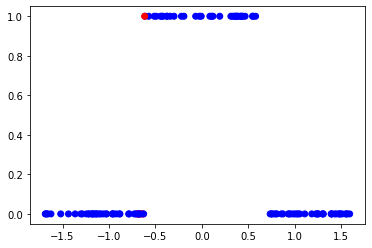

In [ ]:
 y_test_predictions_logit = tf.nn.softmax(model(x_test).numpy()).numpy()
 y_test_predictions = []
for i in range(len(y_test_predictions_logit)):
  if (y_test_predictions_logit[i][0] >= 0.5):
    y_test_predictions.append(0)
  else:
    y_test_predictions.append(1)

import matplotlib
cs = ["blue" if y_test_predictions[i]==y_test[i] else "red" for i in range(len(y_test_predictions))]
matplotlib.pyplot.scatter(x_test,y_test_predictions,color=cs)

## Implementation with scikit learn

You can verify that the implementation of scikit learn gives the same result.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Train network
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
result = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

#Predict value
pred = result.predict(x_test[:,:])

#accuracy
result.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9416666666666667

Don't forget to visualize the final predictions.

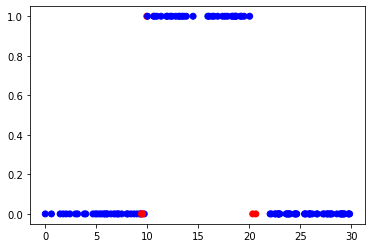

In [ ]:
import matplotlib
cs = ["blue" if y_test[i]==pred[i] else "red" for i in range(len(pred))]
matplotlib.pyplot.scatter(x_test,pred,color=cs)

# Classification with bivariate dataset

## Dataset

With the following dataset, you can test all the different implementations as in the previous section.

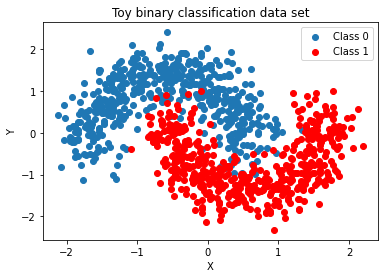

In [16]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import scale

X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)

fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

## Test your own implementation

After you created a neural network for classification, you can test your algorithm for the following dataset, you can generate yourself.

In [ ]:
from math import exp
from random import random, shuffle

# First we split the dataset into a 80/20 rate
def train_test_split(dataset):
  train_rate = int(0.8*len(dataset))
  train = dataset[:train_rate]
  test = dataset[train_rate:]
  return train, test

# Shuffle the dataset
def shuffle_dataset(dataset):
  shuffle(dataset)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
  
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))
 
# Create the dataset
dataset = list()
for i in range(len(X)):
  dataset.append([X[i][0], X[i][1], Y[i]])

# Shuffle the dataset
shuffle_dataset(dataset)

# Split the dataset
train, test = train_test_split(dataset)

# Test training backward propagation algorithm
n_inputs = len(train[0]) - 1
n_outputs = len(set([row[-1] for row in train]))
network = initialize_network(n_inputs, 32, n_outputs)
train_network(network, train, 0.5, 50, n_outputs)

Don't forget to visualize the final predictions.

In [35]:
import matplotlib.pyplot as plt

# Predict the test set and compute the mean square error
n = len(test)
errors = 0
predictions = list()
values_X = list([row[0] for row in test])
values_Y = list([row[1] for row in test])

for row in test:
  prediction = predict(network, row)
  predictions.append(prediction)
  error = row[-1] - prediction
  squared_error = error**2
  errors += squared_error
  #print('Expected=%d, Got=%d' % (row[-1], prediction))
MSE = errors/n
print('MSE:', MSE)


MSE: 0.04


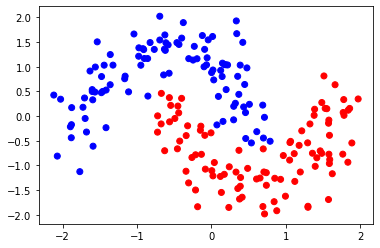

In [30]:
#Visualization

cs = ["blue" if predictions[i]==0 else "red" for i in range(len(predictions))]
plt.scatter(values_X, values_Y, color=cs)

No handles with labels found to put in legend.


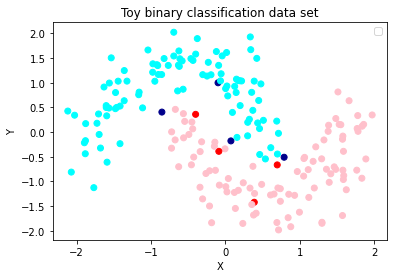

In [33]:
import matplotlib
cs = ["cyan" if predictions[i]==test[i][2] and test[i][2]==0 else 
      "pink"  if predictions[i]==test[i][2] and test[i][2]==1 else 
      "red" if predictions[i]!=test[i][2] and test[i][2]==0 else
      "darkblue" 
      for i in range(len(predictions))]

fig, ax = plt.subplots()
matplotlib.pyplot.scatter([row[0] for row in test],[row[1] for row in test], color=cs)
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

## Implementation with Tensorflow

You can verify that the implementation of tensorflow gives the same result.

In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Create model
# Sequential group layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[2]),
  tf.keras.layers.Dense(128, activation='relu'),
  #The Dropout layer randomly sets input units to 0 with a frequency of rate 
  #at each step during training time, which helps prevent overfitting. 
  #Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2)
])

# For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.
predictions = model(x_train[:1]).numpy()
print("Prediction for first element: ", predictions)

# The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 
print("Convert into probabilities: ", tf.nn.softmax(predictions).numpy())

# loss function when there are two or more label classes. We expect labels to be provided as integers
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

# optimizers shape and mold your model into its most accurate possible form by futzing with the weights.
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
# Training
model.fit(x_train, y_train, epochs=50,  verbose=0)
print("Model (loss & accuracy): ", model.evaluate(x_test,  y_test, verbose=2))

Prediction for first element:  [[-0.4265797  -0.11420474]]
Convert into probabilities:  [[0.42253515 0.5774649 ]]
7/7 - 0s - loss: 0.1026 - accuracy: 0.9800
Model (loss & accuracy):  [0.10261934995651245, 0.9800000190734863]


Don't forget to visualize the final predictions.

No handles with labels found to put in legend.


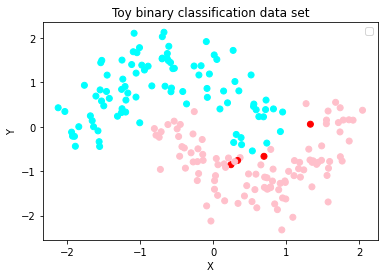

In [21]:
 y_test_predictions_logit = tf.nn.softmax(model(x_test).numpy()).numpy()
 y_test_predictions = []
for i in range(len(y_test_predictions_logit)):
  if (y_test_predictions_logit[i][0] >= 0.5):
    y_test_predictions.append(0)
  else:
    y_test_predictions.append(1)

import matplotlib
cs = ["cyan" if y_test_predictions[i]==y_test[i] and y_test[i]==0 else 
      "pink"  if y_test_predictions[i]==y_test[i] and y_test[i]==1 else 
      "red" if y_test_predictions[i]!=y_test[i] and y_test[i]==0 else
      "darkblue" 
      for i in range(len(y_test_predictions))]

fig, ax = plt.subplots()
matplotlib.pyplot.scatter([row[0] for row in x_test],[row[1] for row in x_test], color=cs)
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');


## Implementation with scikit learn

You can verify that the implementation of scikit learn gives the same result.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


# Split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Train network
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
result = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

#Predict value
pred = result.predict(x_test[:,:])

#accuracy
result.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.95

Don't forget to visualize the final predictions.

No handles with labels found to put in legend.


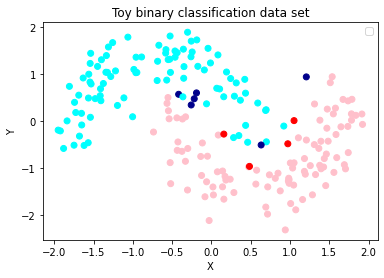

In [23]:
import matplotlib
cs = ["cyan" if pred[i]==y_test[i] and y_test[i]==0 else 
      "pink"  if pred[i]==y_test[i] and y_test[i]==1 else 
      "red" if pred[i]!=y_test[i] and y_test[i]==0 else
      "darkblue" 
      for i in range(len(pred))]

fig, ax = plt.subplots()
matplotlib.pyplot.scatter([row[0] for row in x_test],[row[1] for row in x_test], color=cs)
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

# Neural network for regression

## Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
nb_sim=100
x=np.linspace(0,10,nb_sim*2)

y=np.concatenate((np.linspace(0,9,nb_sim),np.linspace(9,0,nb_sim)), axis=None)


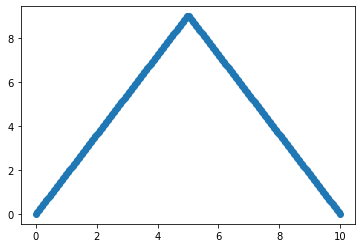

In [ ]:
plt.scatter(x,y)

You have to normalize the dataset first.

In [ ]:
from sklearn.preprocessing import scale
mean = np.mean(x)
std = np.std(x)
X = scale(x)
y = scale(y)

## Your own implementation

From your implementation, you can modify it slightly to make it work for a regression problem.

In [ ]:
#we just have to modify the transfer function 
def transfer(activation):
  return activation

In [ ]:
#First we split the dataset into a 80/20 rate
def train_test_split(dataset):
  train_rate = int(0.8*len(dataset))
  test_rate = int(0.2*len(dataset))
  train = dataset[:train_rate]
  test = dataset[test_rate:]
  return train, test

# Initialize a network
from random import random
def initialize_network(n_inputs , n_hidden , n_outputs):
  network = list()
  hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)] 
  network.append(hidden_layer)
  output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)] # output layer should be defined here
  network.append(output_layer)#output layer should be added to the network here
  return network

# Calculate neuron activation for an input
#for the hidden layer, input can be a row from training set, and for output layer, it's the output of each neuron in the hidden layer
def activate(weights, inputs):
  activation = weights[-1]
  for i in range(len(inputs)):
    activation += (weights[i] * inputs[i]) 
  return activation

#Here we proceed to the transfer of the activation function to see what is the output of the neuron. Different transfer function are possibel. Here we will use
#the sigmoid function (S shape, alternante between 0 and 1)
from math import exp
def transfer(activation):
  return 1.0/(1.0 + exp(-activation))

# Forward propagate input to a network output
#In this function, we calculate the output of a layer's neuron and then the value is stored and become the input for the next layer, and that
#until the final layer is done
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

#First we need to calculate the derivative, the slope of the output of a neuron
def transfer_derivative(output):
  return output * (1.0 - output)

#Then we apply the error backpropagation
#We have to calculate the error for each output neuron
def backward_propagate_error(network, expected):
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = list()
    if i != len(network) -1 :
      for j in range(len(layer)):
        error = 0.0 
        for neuron in network[i + 1]:
          error += (neuron['weights'][j] * neuron['delta'])
        errors.append(error)
    else : 
      for j in range(len(layer)):
        neuron = layer[j]
        errors.append(expected[j] - neuron['output'])
    for j in range(len(layer)):
      neuron = layer[j]
      neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

#We will now use the error to update the weights
#weight = weight + learning_rate * error * input (weight : given weight, lr : we will specify it later, error : the one we calculated, input : input that caused the error)
def update_weights(network, row, l_rate):
	for i in range(len(network)):
   #input for first layer when i = 0
		inputs = row[:-1]
    #then input of other layer is output of previous layer
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j] #=> weight = weight + learning_rate * error * input
			neuron['weights'][-1] += l_rate * neuron['delta']

#We create a function that involves looping for a number of epochs and for each epochs update the network
#This function take as parameters an initialized neural network, a training dataset, learning rate, number of epochs and expected number of value
def train_network(network, train, l_rate, n_epoch, n_outputs):
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(network, row) #because forward propagate calculate the output of a neuron
      expected = row[1]
      sum_error += sum([(expected-outputs[0])**2]) #formula for the mean square error
      backward_propagate_error(network, [expected]) #we add delta to the network
      update_weights(network, row, l_rate) #we modify weights
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
  
#For now, we just worked on training de neural network.
#We will now work on a predict function, function that just call the forward_propagate function because it's all we need to make a first prediction
#So this procedure return the index of the output with the bigger probability

def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs

## Test your own implementation

After you created a neural network for classification, you can test your algorithm for the following dataset, you can generate yourself.

In [ ]:
#we create the dataset in useful way 
dataset = list()
for i in range(len(X)):
  dataset.append([X[i], y[i]])

#we split the dataset
train, test = train_test_split(dataset)

#initialize network
network = initialize_network(1,7,1)# we have one variable and one possible outcome
train_network(network, train, 0.5, 10, 1)

>epoch=0, lrate=0.500, error=157.378
>epoch=1, lrate=0.500, error=141.592
>epoch=2, lrate=0.500, error=135.029
>epoch=3, lrate=0.500, error=130.187
>epoch=4, lrate=0.500, error=122.405
>epoch=5, lrate=0.500, error=112.131
>epoch=6, lrate=0.500, error=105.246
>epoch=7, lrate=0.500, error=100.345
>epoch=8, lrate=0.500, error=96.386
>epoch=9, lrate=0.500, error=93.088


Don't forget to visualize the final predictions.

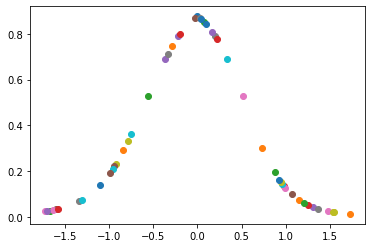

In [ ]:
pred = []
for row in test:
  pred.append([row[0],predict(network, row)[0]])
  plt.scatter(row[0],predict(network, row)[0])

In [ ]:
for row in test:
	prediction = predict(network, row)
	print('Expected=%.3f, Got=%.3f' % (row[-1], prediction[0]))

Expected=-0.329, Got=0.337
Expected=-0.294, Got=0.355
Expected=-0.260, Got=0.374
Expected=-0.225, Got=0.393
Expected=-0.191, Got=0.413
Expected=-0.156, Got=0.433
Expected=-0.121, Got=0.453
Expected=-0.087, Got=0.473
Expected=-0.052, Got=0.493
Expected=-0.017, Got=0.513
Expected=0.017, Got=0.533
Expected=0.052, Got=0.553
Expected=0.087, Got=0.572
Expected=0.121, Got=0.591
Expected=0.156, Got=0.609
Expected=0.191, Got=0.627
Expected=0.225, Got=0.645
Expected=0.260, Got=0.661
Expected=0.294, Got=0.677
Expected=0.329, Got=0.693
Expected=0.364, Got=0.707
Expected=0.398, Got=0.721
Expected=0.433, Got=0.734
Expected=0.468, Got=0.747
Expected=0.502, Got=0.759
Expected=0.537, Got=0.770
Expected=0.572, Got=0.781
Expected=0.606, Got=0.791
Expected=0.641, Got=0.800
Expected=0.676, Got=0.809
Expected=0.710, Got=0.817
Expected=0.745, Got=0.825
Expected=0.779, Got=0.832
Expected=0.814, Got=0.838
Expected=0.849, Got=0.845
Expected=0.883, Got=0.851
Expected=0.918, Got=0.856
Expected=0.953, Got=0.861
Ex

## Implementation with Tensorflow

You can verify that the implementation of tensorflow gives the same result.

In [ ]:
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

input_layer = Input(shape=[1])
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)
model = Model(inputs=input_layer, outputs=output)


model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

history = model.fit(x_train, y_train, batch_size=2, epochs=100, verbose=0, validation_split=0.2)

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.013854259467947895
0.013517015644216958


Don't forget to visualize the final predictions.

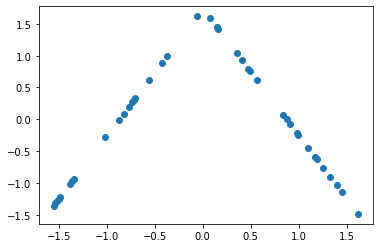

In [ ]:
plt.scatter(x_test, pred)

## Implementation with scikit learn

You can verify that the implementation of scikit learn gives the same result.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Train network
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
result = MLPRegressor(random_state=1, max_iter=400, activation ='tanh', solver = 'lbfgs').fit(x_train, y_train)

#Predict value
pred = result.predict(x_test[:,:])

#accuracy
result.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9989039778094054

Don't forget to visualize the final predictions.

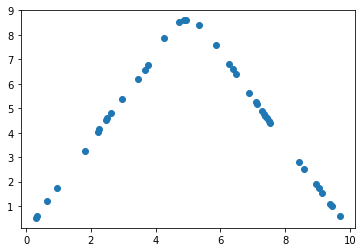

In [ ]:
plt.scatter(x_test, pred)

# Regression with another dataset

In [ ]:
nb_sim=1000
X = np.linspace(0.0 , 2.0 * np.pi, nb_sim).reshape(-1, 1)
y = 3 * np.sin(X) + np.random.normal(0, 1, nb_sim).reshape(-1, 1)

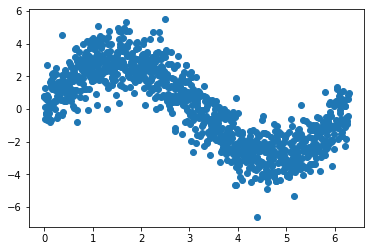

In [ ]:
plt.scatter(X,y)

## Test your own implementation

After you created a neural network for classification, you can test your algorithm for the following dataset, you can generate yourself.

Don't forget to visualize the final predictions.

## Implementation with Tensorflow

You can verify that the implementation of tensorflow gives the same result.

In [ ]:
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

input_layer = Input(shape=[1])
dense_layer_1 = Dense(128, activation='relu')(input_layer)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)
model = Model(inputs=input_layer, outputs=output)

model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

history = model.fit(x_train, y_train, batch_size=2, epochs=20, verbose=1, validation_split=0.2)

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

Epoch 1/20
320/320 [==============================] - 1s 2ms/step - loss: 4.9332 - mean_squared_error: 4.9332 - val_loss: 2.5178 - val_mean_squared_error: 2.5178
Epoch 2/20
320/320 [==============================] - 1s 2ms/step - loss: 2.4038 - mean_squared_error: 2.4038 - val_loss: 1.7131 - val_mean_squared_error: 1.7131
Epoch 3/20
320/320 [==============================] - 1s 2ms/step - loss: 1.9883 - mean_squared_error: 1.9883 - val_loss: 1.5472 - val_mean_squared_error: 1.5472
Epoch 4/20
320/320 [==============================] - 1s 2ms/step - loss: 1.8772 - mean_squared_error: 1.8772 - val_loss: 1.5037 - val_mean_squared_error: 1.5037
Epoch 5/20
320/320 [==============================] - 1s 2ms/step - loss: 1.9358 - mean_squared_error: 1.9358 - val_loss: 1.4544 - val_mean_squared_error: 1.4544
Epoch 6/20
320/320 [==============================] - 1s 2ms/step - loss: 1.6963 - mean_squared_error: 1.6963 - val_loss: 1.5310 - val_mean_squared_error: 1.5310
Epoch 7/20
320/320 [========

Don't forget to visualize the final predictions.

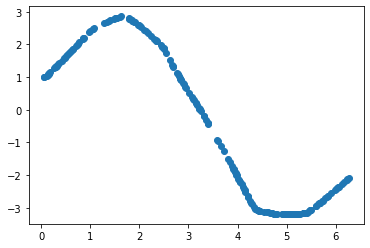

In [ ]:
plt.scatter(x_test, pred)

## Implementation with scikit learn

You can verify that the implementation of scikit learn gives the same result.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Train network
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
result = MLPRegressor(random_state=1, max_iter=400, activation ='relu',solver='lbfgs').fit(x_train, y_train)

#Predict value
pred = result.predict(x_test[:,:])

#accuracy
result.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8360867456965675

Don't forget to visualize the final predictions.

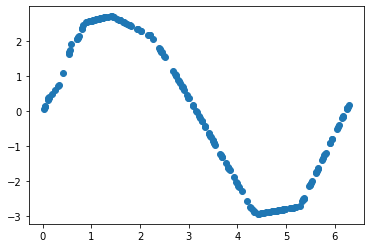

In [ ]:
plt.scatter(x_test, pred)

# Documentation

https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/



https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

You have to add the bias

In [ ]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

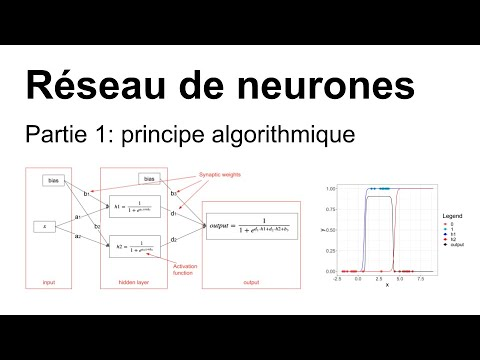

In [ ]:

from IPython.display import YouTubeVideo

YouTubeVideo('3HGNslZp1NI', width="100%", height=800)

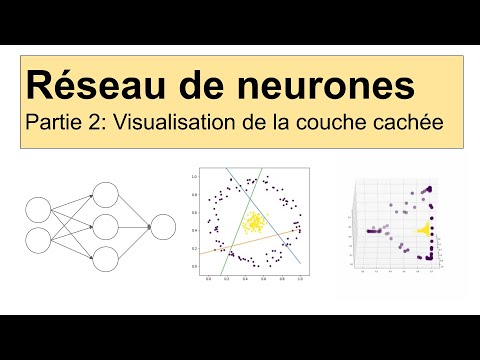

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('c4pyAulL1Jw', width="100%", height=800)